In [1]:
#install.packages("MuMIn")
library(MCMCglmm)
library(lme4) #random effect 
#'lmerTest' should be used in place of 'lme4', If lmer model p-values are desired 
library(rptR) 

library(ggplot2)
library(MuMIn) #r.squaredGLMM

library(dplyr) #to work easier with df (%>%)

Warning message:
"package 'MCMCglmm' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: coda

Warning message:
"package 'coda' was built under R version 4.0.5"
Loading required package: ape

Warning message:
"package 'rptR' was built under R version 4.0.5"
Warning message:
"package 'MuMIn' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_adapt = file.path(path_,'Adaptability')
path_model = file.path(path_adapt,'repeatability_model')
df = read.csv(file.path(path_adapt,'df_MVT_4individualtyStatistics.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$WIB = as.factor(df$WIB) 
df$TrackingSystemID = as.factor(df$TrackingSystemID) 
#ean-centring of the environmental variable so that intercepts reflect average values for the population and individuals
#df$cDIB = scale(df$temperatute) #TODO
df$cDIB = as.integer(df$DIB) 
df$cDIBfact = as.factor(df$cDIB) 
#mean-centre temperatures using the scalefunction, 
#mean-centring of the environmental variable so that intercepts reflect avg values for the population and individuals

#li_var_cont = c('ID0','ID1','ID2','ID3','ID4','ID5','ID6','ID7')
#df$maxsevGap0_divided_maxsev_round = round(df$maxsevGap0_divided_maxsev, 1)
#df$maxsevGap0_divided_maxsev_round_log <- log(df$maxsevGap0_divided_maxsev_round)
#print(as.data.frame(table(df$maxsevGap0_divided_maxsev_round)))
#df_ = df[,c(li_var_cont, 'maxsevGap0_divided_maxsev_round','maxsevGap0_divided_maxsev_round_log')] 
print(dim(df))
summary(df)

[1] 3161   33


      WIB          HenID           DIB        weeklyavgDIB      CLASS          
 5      :455   hen_124:  49   Min.   : 1.0   Min.   : 3.25   Length:3161       
 6      :455   hen_126:  49   1st Qu.:18.0   1st Qu.:18.00   Class :character  
 7      :455   hen_127:  49   Median :30.0   Median :32.00   Mode  :character  
 4      :453   hen_131:  49   Mean   :29.4   Mean   :29.40                     
 3      :420   hen_134:  49   3rd Qu.:42.0   3rd Qu.:39.00                     
 1      :358   hen_135:  49   Max.   :54.0   Max.   :52.00                     
 (Other):565   (Other):2867                                                    
             TrackingSystemID   PenID     perc_duration_5_Zone
 TrackingSystem 10-12:1613    pen10:882   Min.   :  0.00      
 TrackingSystem 3-5  : 764    pen12:731   1st Qu.:  8.00      
 TrackingSystem 8-9  : 784    pen4 :764   Median : 26.00      
                              pen8 :784   Mean   : 35.17      
                                          3rd

# Models

In [3]:
TODO: 
add external temperature and humidity
add all animals?
add class
temporal autocorrlation???!!!

ERROR: Error in parse(text = x, srcfile = src): <text>:2:5: unexpected symbol
1: TODO: 
2: add external
       ^


In [ ]:
#"Let us first fit a simple linear mixed model and observe the average population-level reaction norm."
model1.1 = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1|PenID), REML = FALSE, data = df)
#"So, let us fit a quadratic fixed-effect of temperature to model to these data"
model1.2 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1|PenID), REML = FALSE, data = df)
#"To further develop the model, the overall population-level reaction norm as model1.2is kept the same, but with an
#additional term of(1|genotype),which specifies that we are allowing the 𝑦-intercept value to vary among genotypes."
model1.3.a = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1|PenID/HenID), REML = FALSE, data = df)
model1.3.b = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1|PenID/HenID), REML = FALSE, data = df)
#To evaluate whether model fit can be improved further, we can allow the slopes of genotypes to vary in addition to the 
#intercepts, allowing the slopes of the random HenID regressions to vary across #days post-transfer. 
#"Thus, the random component of the random regression mixed model is now written as (1+ctemperature|genotype), which specifies 
#that the random component that genotype can vary both in intercept and in slope"
model1.4 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1+cDIB|PenID/HenID), REML = FALSE, data = df)
#Afinal attempt to improve the model fit is to allow the random effect of genotypeto vary in not only intercept and slope, 
#but also in curvature, by fitting an additionalquadratic random effect term.
model1.5.a = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)
model1.5.b = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)
model1.5.c = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)

In [ ]:
model1.5.c = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)

In [ ]:
#smal summary to view all
summary(model1.1)$logLik
summary(model1.2)$logLik
summary(model1.3.a)$logLik
summary(model1.3.b)$logLik
summary(model1.4)$logLik
summary(model1.5.a)$logLik
summary(model1.5.b)$logLik
summary(model1.5.c)$logLik
print('test')
chi2 = 2*(summary(model1.2)$logLik -summary(model1.1)$logLik)
1-pchisq(chi2, 1)
chi2 = 2*(summary(model1.3.b)$logLik -summary(model1.3.a)$logLik)
1-pchisq(chi2, 1)
chi2 = 2*(summary(model1.3.b)$logLik -summary(model1.2)$logLik)
1-pchisq(chi2, 1)
chi2 = 2*(summary(model1.4)$logLik -summary(model1.3.b)$logLik)
1-pchisq(chi2, 1)
chi2 = 2*(summary(model1.5.b)$logLik -summary(model1.5.a)$logLik)
1-pchisq(chi2, 0)
chi2 = 2*(summary(model1.5.b)$logLik -summary(model1.4)$logLik)
1-pchisq(chi2, 0)
chi2 = 2*(summary(model1.5.b)$logLik -summary(model1.5.c)$logLik)
1-pchisq(chi2, 0)
AIC(model1.1, model1.2, model1.3.a, model1.3.b, model1.4, model1.5.a, model1.5.b, model1.5.c)

### model 1

In [4]:
model1.1 = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1|PenID), REML = FALSE, data = df)
summary(model1.1)
r.squaredGLMM(model1.1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ cDIB + (1 | cDIBfact) + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  8707.9   8738.2  -4348.9   8697.9     3156 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9681 -0.8356 -0.2077  0.9678  2.0227 

Random effects:
 Groups   Name        Variance Std.Dev.
 cDIBfact (Intercept) 0.01399  0.1183  
 PenID    (Intercept) 0.02364  0.1537  
 Residual             0.90416  0.9509  
Number of obs: 3161, groups:  cDIBfact, 52; PenID, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept)  0.477212   0.092246   5.173
cDIB        -0.016085   0.001554 -10.349

Correlation of Fixed Effects:
     (Intr)
cDIB -0.489

Warning message:
"'r.squaredGLMM' now calculates a revised statistic. See the help page."


R2m,R2c
0.05929605,0.09687609


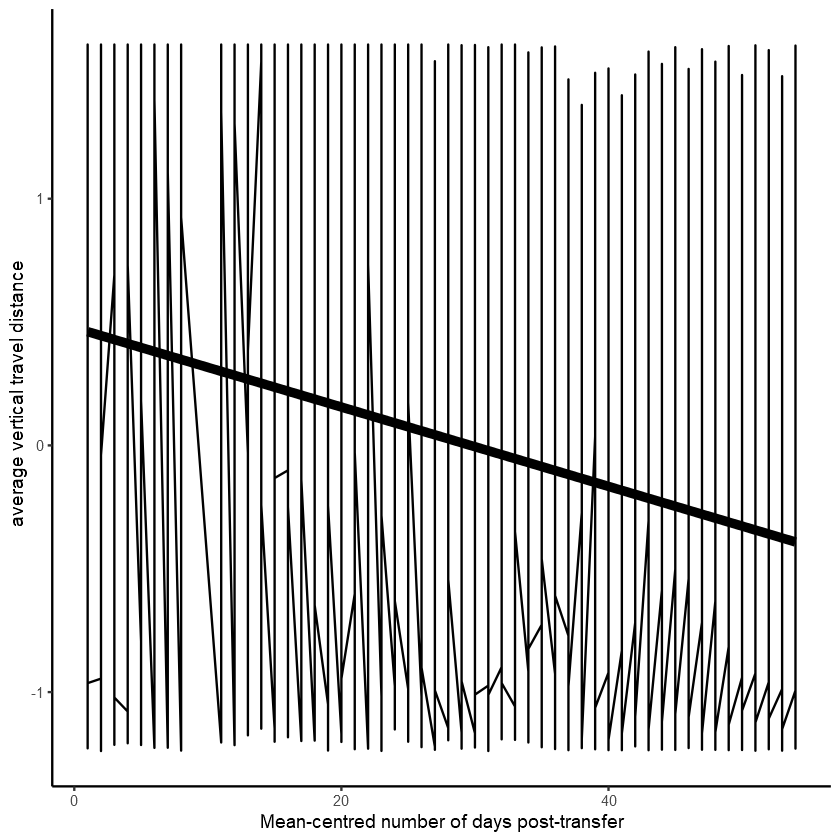

In [5]:
#visually assess how well the lm model fits the raw data by overlaying the regression line from
#model1.1 as an average population-level reaction norm.
#predict PC1 across the DIB, and plot the fixed effect of #days post-transfer over the raw individuals' reactions norms.
cDIB_pred = data.frame(cDIB = seq(from = min(df$cDIB), to = max(df$cDIB), length.out = max(df$cDIB)-min(df$cDIB)))
cDIB_pred$fit1.1 = predict(model1.1, newdata = cDIB_pred, re.form = NA)
# Plot the raw data and overlay the fit of Model1.1
ggplot(cDIB_pred, aes(x = cDIB, y = fit1.1)) +
geom_line(data = df, aes(y = PC1_standardized)) +
geom_line(size = 2) +
ylab("average vertical travel distance") + xlab("Mean-centred number of days post-transfer") +
theme_classic()

### model 2

In [6]:
#fit a quadratic fixed-effect of #days-post transfer to model to these data (3 would be cubic)
model1.2 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1|PenID), REML = FALSE, data = df)
summary(model1.2)
r.squaredGLMM(model1.2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ poly(cDIB, 2, raw = T) + (1 | cDIBfact) +  
    (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  8688.2   8724.5  -4338.1   8676.2     3155 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1600 -0.8387 -0.2079  0.9504  1.9878 

Random effects:
 Groups   Name        Variance Std.Dev.
 cDIBfact (Intercept) 0.003534 0.05945 
 PenID    (Intercept) 0.024447 0.15636 
 Residual             0.904412 0.95101 
Number of obs: 3161, groups:  cDIBfact, 52; PenID, 4

Fixed effects:
                          Estimate Std. Error t value
(Intercept)              7.212e-01  9.997e-02   7.214
poly(cDIB, 2, raw = T)1 -4.119e-02  4.930e-03  -8.356
poly(cDIB, 2, raw = T)2  4.503e-04  8.529e-05   5.279

Correlation of Fixed Effects:
              (Intr) p(DIB,2,r=T)1
p(DIB,2,r=T)1 -0.546              
p(DIB,2,r=T)2  0.469 -0.968       

R2m,R2c
0.06844275,0.09639868


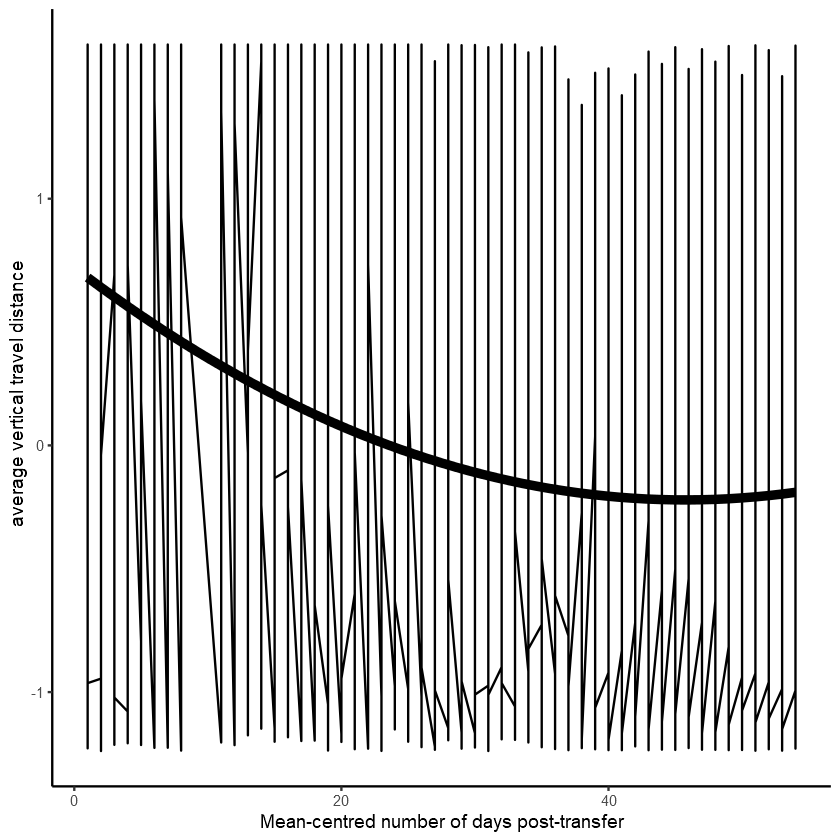

In [7]:
cDIB_pred$fit1.2 = predict(model1.2, newdata = cDIB_pred, re.form = NA)
ggplot(cDIB_pred, aes(x = cDIB, y = fit1.2)) +
geom_line(data = df, aes(y = PC1_standardized)) +
geom_line(size = 2) +
ylab("average vertical travel distance") + xlab("Mean-centred number of days post-transfer") +
theme_classic()

In [8]:
#compare the log-likelihoods of the two models and perform a likelihood ratio test (LRT).
#Here, we take 2 ×the log-likelihood values from the model summaries to determine a 𝜒+value, 
#and then determine the p-value of the LRT from the 𝜒+value and the difference of the degrees of freedom(df) between the two models using the function 1-pchisq(chi2, df)
#CHECK df difference between models (by looking at the df within the models being compared)
summary(model1.1)$logLik
summary(model1.2)$logLik
chi2 = 2*(summary(model1.2)$logLik -summary(model1.1)$logLik)
1-pchisq(chi2,1) # chi2, df
AIC(model1.1, model1.2)
#--> not clear R2 did not change test say yes. try both in the model 3

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

'log Lik.' -4348.945 (df=5)

'log Lik.' -4338.098 (df=6)

'log Lik.' 3.19662e-06 (df=6)

,df,AIC
,<dbl>,<dbl>
model1.1,5,8707.890
model1.2,6,8688.195


### model 3

In [9]:
#random intercept model with "the overall population-level reaction norm as model1.2is kept the same"
#model1.3 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1|PenID/HenID), REML = FALSE, data = df)
model1.3.a = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1|PenID/HenID), REML = FALSE, data = df)
summary(model1.3.a)
r.squaredGLMM(model1.3.a)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ cDIB + (1 | cDIBfact) + (1 | PenID/HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  7382.9   7419.2  -3685.4   7370.9     3155 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7170 -0.7322 -0.0318  0.6700  2.8535 

Random effects:
 Groups      Name        Variance  Std.Dev.
 HenID:PenID (Intercept) 0.3694886 0.60786 
 cDIBfact    (Intercept) 0.0191051 0.13822 
 PenID       (Intercept) 0.0006577 0.02564 
 Residual                0.5507343 0.74211 
Number of obs: 3161, groups:  HenID:PenID, 65; cDIBfact, 52; PenID, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.47867    0.09134   5.241
cDIB        -0.01624    0.00153 -10.614

Correlation of Fixed Effects:
     (Intr)
cDIB -0.483

R2m,R2c
0.06048074,0.449539


In [10]:
model1.3.b = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1|PenID/HenID), REML = FALSE, data = df)
summary(model1.3.b)
r.squaredGLMM(model1.3.b)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ poly(cDIB, 2, raw = T) + (1 | cDIBfact) +  
    (1 | PenID/HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  7364.1   7406.5  -3675.1   7350.1     3154 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8133 -0.7142 -0.0230  0.6727  2.8987 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 0.369371 0.60776 
 cDIBfact    (Intercept) 0.009277 0.09632 
 PenID       (Intercept) 0.001206 0.03472 
 Residual                0.550877 0.74221 
Number of obs: 3161, groups:  HenID:PenID, 65; cDIBfact, 52; PenID, 4

Fixed effects:
                          Estimate Std. Error t value
(Intercept)              7.143e-01  9.896e-02   7.219
poly(cDIB, 2, raw = T)1 -4.061e-02  4.926e-03  -8.245
poly(cDIB, 2, raw = T)2  4.380e-04  8.548e-05   5.124

Correlation of Fixed Effects:
              (Intr) p(DIB,2,r=T)1
p(DIB,2,r=T)1 -0.546              
p(DIB,

R2m,R2c
0.06881396,0.4488536


In [11]:
#CHECK df difference between models (by looking at the df within the models being compared)
summary(model1.2)$logLik
summary(model1.3.a)$logLik
summary(model1.3.b)$logLik
chi2 = 2*(summary(model1.3.b)$logLik -summary(model1.3.a)$logLik)
1-pchisq(chi2, 1)
chi2 = 2*(summary(model1.3.b)$logLik -summary(model1.2)$logLik)
1-pchisq(chi2, 0)
AIC(model1.1, model1.2, model1.3.a, model1.3.b)
#"Adding the random intercepts term in model1.3 explains far more residual variance than model1.2 without trading-off against increased model complexity: so much so that the p-value for the LRT is essentially zero and the difference in AIC values between model1.2 and model1.3 is huge.""

'log Lik.' -4338.098 (df=6)

'log Lik.' -3685.428 (df=6)

'log Lik.' -3675.053 (df=7)

'log Lik.' 5.231722e-06 (df=7)

'log Lik.' 0 (df=7)

,df,AIC
,<dbl>,<dbl>
model1.1,5,8707.890
model1.2,6,8688.195
model1.3.a,6,7382.856
model1.3.b,7,7364.106


In [14]:
model1.3 = model1.3.b

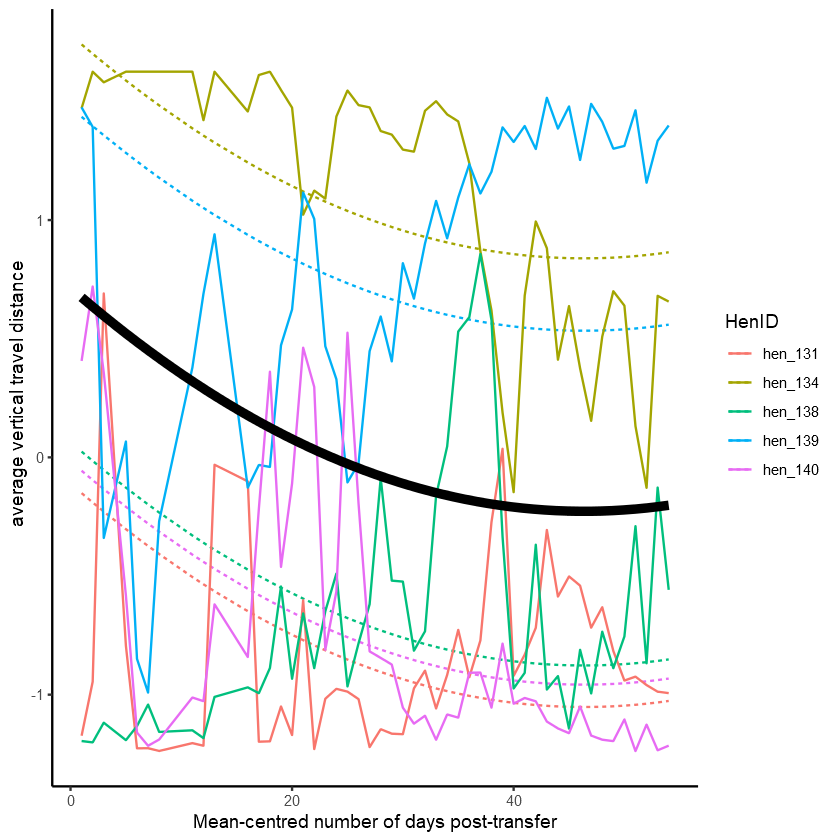

In [20]:
cDIB_pred$fit1.3 = predict(model1.3, newdata = cDIB_pred, re.form = NA)
df$pred_pop1.3  = predict(model1.3, re.form = NA)
df$pred_HenID1.3 = predict(model1.3, re.form = ~(1|PenID/HenID))
ggplot(cDIB_pred, aes(x = cDIB, y = fit1.3)) +
geom_line(data = df_plot, 
          aes(y = pred_HenID1.3, group = HenID, colour = HenID), lty = 2) +
geom_line(data = df_plot, 
          aes(y = PC1_standardized, group = HenID, colour = HenID)) +
geom_line(size = 2) +
ylab("average vertical travel distance") + xlab("Mean-centred number of days post-transfer") +
theme_classic()

### model 4

In [16]:
model1.4 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1+cDIB|PenID/HenID), REML = FALSE, data = df)
summary(model1.4)
r.squaredGLMM(model1.3)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ poly(cDIB, 2, raw = T) + (1 | cDIBfact) +  
    (1 + cDIB | PenID/HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  6238.0   6304.6  -3108.0   6216.0     3150 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2026 -0.5871 -0.0388  0.6284  3.5611 

Random effects:
 Groups      Name        Variance  Std.Dev.  Corr 
 HenID:PenID (Intercept) 1.086e+00 1.0423494      
             cDIB        8.260e-04 0.0287407 -0.81
 cDIBfact    (Intercept) 1.281e-02 0.1131754      
 PenID       (Intercept) 1.220e-03 0.0349334      
             cDIB        3.117e-07 0.0005583 -1.00
 Residual                3.538e-01 0.5948438      
Number of obs: 3161, groups:  HenID:PenID, 65; cDIBfact, 52; PenID, 4

Fixed effects:
                          Estimate Std. Error t value
(Intercept)              0.7101946  0.1443253   4.921
poly(cDIB, 2, raw = T)1 -0.0401693  0.0061152  -6.569
poly(cDIB, 2

R2m,R2c
0.06881396,0.4488536


In [23]:
li_selected_hen = c('hen_131', 'hen_134', 'hen_138', 'hen_139', 'hen_140')
df_plot = df[ which(df$HenID %in% li_selected_hen), ]
li_selected_henpens = c('hen_131:pen10', 'hen_134:pen10', 'hen_138:pen10', 'hen_139:pen10', 'hen_140:pen10')
`%notin%` = Negate(`%in%`)
#df_plot$HenIDcolors = df_plot$HenID
#df_plot$HenIDcolors = replace(df_plot$HenIDcolors, df_plot$HenIDcolors %notin% li_selected_henpens, "#FF6666")
#choose color
#http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf find color

In [24]:
cDIB_pred$fit1.4 = predict(model1.4, newdata = cDIB_pred, re.form = NA)
df$pred_pop1.4  = predict(model1.4, re.form = NA)
df$pred_HenID1.4 = predict(model1.4, re.form = ~(1+cDIB|PenID/HenID))

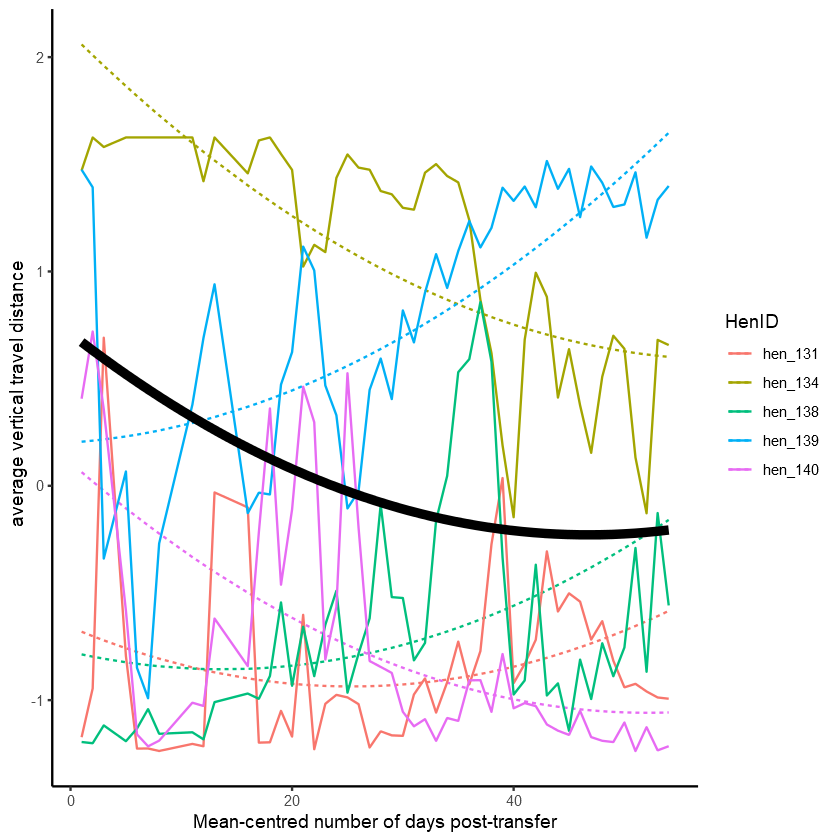

In [25]:
ggplot(cDIB_pred, aes(x = cDIB, y = fit1.4)) +
geom_line(data = df_plot,
          aes(y = pred_HenID1.4, group = HenID, colour = HenID), lty = 2) +
geom_line(data = df_plot,
          aes(y = PC1_standardized, group = HenID, colour = HenID)) + 
geom_line(size = 2) +
ylab("average vertical travel distance") + xlab("Mean-centred number of days post-transfer") +
theme_classic()
#ggsave(file.path(path_,'Adaptability','IndividualPlasticity.png'),width=12, height=4, bg = "transparent")

In [26]:
chi2 <-2*(summary(model1.4)$logLik -summary(model1.3)$logLik)
summary(model1.3)$logLik
summary(model1.4)$logLik
1-pchisq(chi2, 5)
AIC(model1.1, model1.2, model1.3, model1.4)

'log Lik.' -3675.053 (df=7)

'log Lik.' -3107.994 (df=11)

'log Lik.' 0 (df=11)

,df,AIC
,<dbl>,<dbl>
model1.1,5,8707.890
model1.2,6,8688.195
model1.3,7,7364.106
model1.4,11,6237.987


In [27]:
#save
write.csv(df, file.path(path_,'Adaptability','IndividualPlasticity.csv'), row.names = FALSE)

### model 5

In [28]:
model1.5 = lmer(PC1_standardized ~ cDIB + (1|cDIBfact) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)
summary(model1.5)
r.squaredGLMM(model1.5)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ cDIB + (1 | cDIBfact) + (1 + cDIB + I(cDIB^2) |  
    PenID/HenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  5947.0   6044.0  -2957.5   5915.0     3145 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8179 -0.5614 -0.0340  0.5721  3.7096 

Random effects:
 Groups      Name        Variance  Std.Dev.  Corr       
 HenID:PenID (Intercept) 6.181e-01 7.862e-01            
             cDIB        1.111e-03 3.333e-02 -0.52      
             I(cDIB^2)   4.839e-07 6.956e-04  0.04 -0.74
 cDIBfact    (Intercept) 1.395e-09 3.735e-05            
 PenID       (Intercept) 2.905e-01 5.390e-01            
             cDIB        1.013e-04 1.007e-02 -1.00      
             I(cDIB^2)   1.463e-04 1.210e-02  0.66 -0.66
 Residual                3.158e-01 5.619e-01            
Number of obs: 3161, groups:  HenID:PenID, 65; cDIBfact, 52; PenID, 4

Fixed effects:
             Estimate St

R2m,R2c
0.001326404,0.9989151


In [ ]:
OR?? TODO

In [ ]:
model1.5 = lmer(PC1_standardized ~ poly(cDIB, 2, raw = T) + (1|cDIBfact) + (1 + cDIB + I(cDIB^2)|PenID/HenID), REML = FALSE, data = df)
summary(model1.5)
r.squaredGLMM(model1.5)

In [29]:
chi2 = 2*(summary(model1.5)$logLik -summary(model1.4)$logLik)
summary(model1.4)$logLik
summary(model1.5)$logLik
1-pchisq(chi2, 5)
AIC(model1.1, model1.2, model1.3, model1.4, model1.5)

'log Lik.' -3107.994 (df=11)

'log Lik.' -2957.508 (df=16)

'log Lik.' 0 (df=16)

,df,AIC
,<dbl>,<dbl>
model1.1,5,8707.890
model1.2,6,8688.195
model1.3,7,7364.106
model1.4,11,6237.987
model1.5,16,5947.016


# Rank plasticity

In [ ]:
TODO link it with health: 
if link with rank: perfect.
if no link with ranked and value we perhaps dont care and keep ranked only, if only assocation with value, we
must copute uncertainty and remove the uncertain observation perhaps?

In [65]:
#ranef(model1.5)$HenID

In [30]:
HenID_results = ranef(model1.5)$HenID
#colnames(HenID_data) <- c("HenID", "BLUP_int")
HenID_results = cbind(HenID = rownames(HenID_results), HenID_results)
rownames(HenID_results) = 1:nrow(HenID_results)
#rename intercept into BLUP_int
colnames(HenID_results) <- c("HenID", "BLUP_int", "BLUP_slopes", "BLUP_quadratiqueslopes")
HenID_results

,HenID,BLUP_int,BLUP_slopes,BLUP_quadratiqueslopes
,<chr>,<dbl>,<dbl>,<dbl>
1,hen_123:pen4,-1.69318028,0.044930190,5.293375e-04
2,hen_124:pen8,0.91940730,0.015375517,-9.518933e-04
3,hen_126:pen8,1.21456077,-0.074514498,1.300927e-03
4,hen_127:pen8,1.14394573,-0.013949416,-7.412994e-04
5,hen_128:pen4,0.87149046,-0.013195092,-7.822640e-05
6,hen_131:pen10,-1.16005491,0.019817858,-1.423279e-04
7,hen_134:pen10,1.23031691,0.027587354,-7.990531e-04
8,hen_135:pen12,1.10783900,-0.026813449,-3.599716e-04
9,hen_136:pen8,-0.42899661,0.092668311,-1.193756e-03


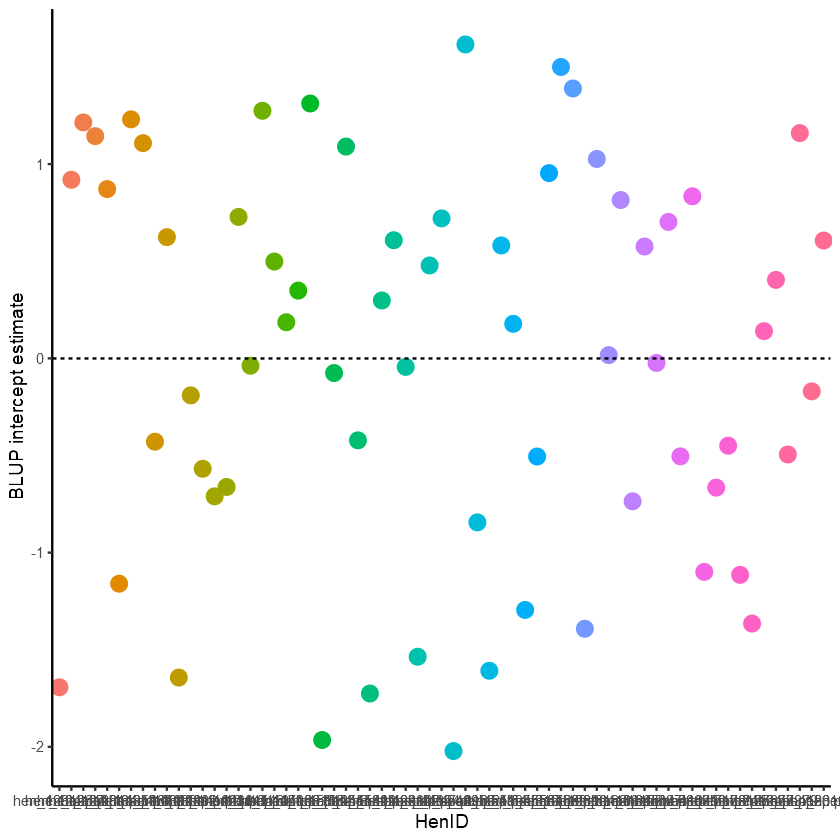

In [31]:
ggplot(HenID_results, aes(HenID, BLUP_int)) + 
geom_point(aes(group = HenID, colour = HenID), size = 4, show.legend = FALSE) + 
ylab("BLUP intercept estimate") +
geom_hline(yintercept = 0, lty = 2) + theme_classic()

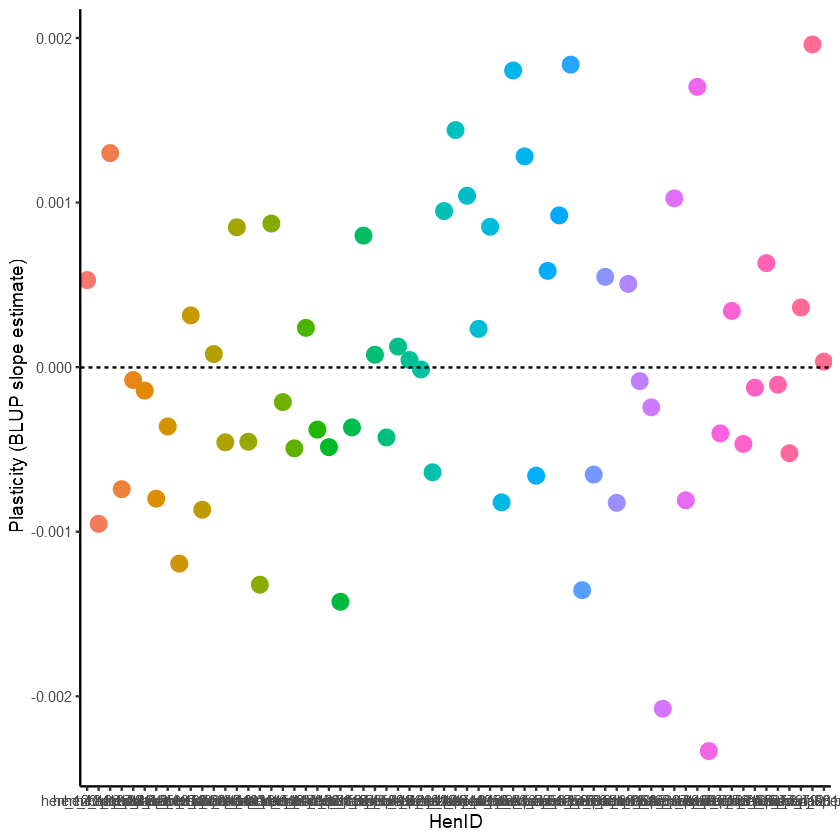

In [32]:
ggplot(HenID_results, aes(HenID, BLUP_quadratiqueslopes)) + 
geom_point(aes(group = HenID, colour = HenID), size = 4, show.legend = FALSE) + 
ylab("Plasticity (BLUP slope estimate)") +
geom_hline(yintercept = 0, lty = 2) + 
theme_classic()

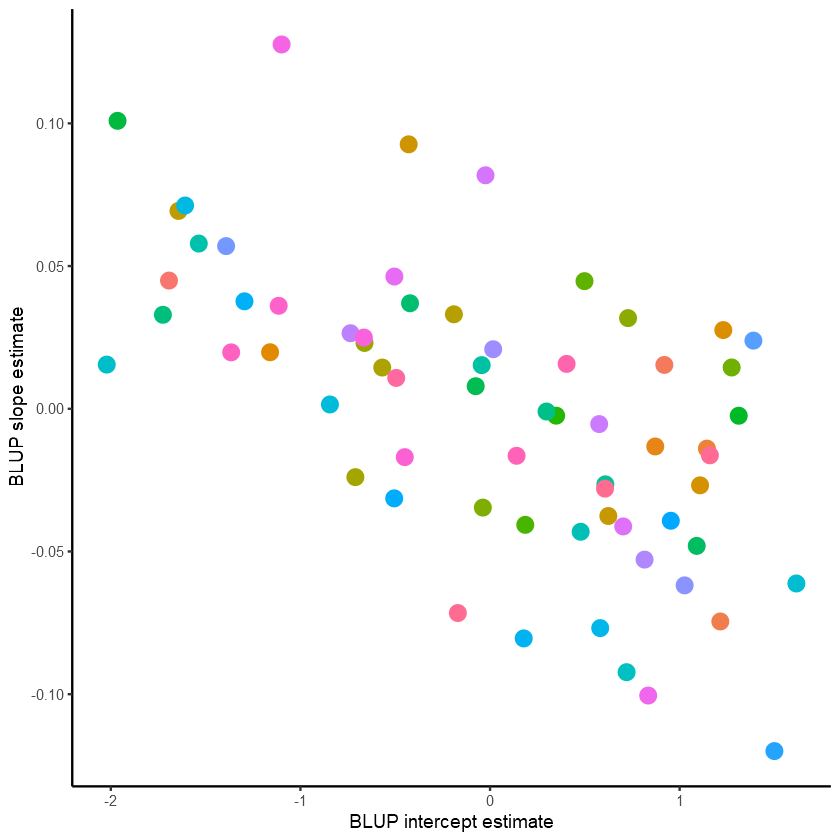

In [33]:
ggplot(HenID_results, aes(BLUP_int, BLUP_slopes)) +
geom_point(aes(group = HenID, colour = HenID), size = 4, show.legend = FALSE) +
xlab("BLUP intercept estimate") +
ylab("BLUP slope estimate") +
theme_classic()
#--> greater intercept

In [34]:
HenID_results$HenIDcolors = HenID_results$HenID
HenID_results$HenIDcolors = replace(HenID_results$HenIDcolors, HenID_results$HenIDcolors %notin% li_selected_henpens, "#FF6666")

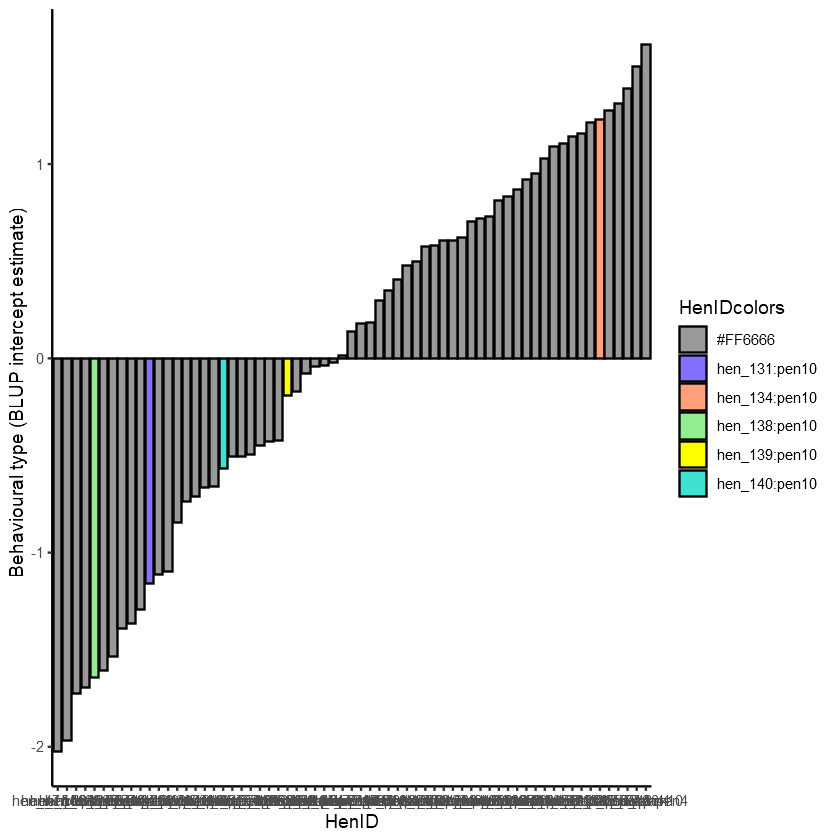

In [35]:
# Rank the BLUPs in order
# Sort BLUPs by interecepts 
HenID_results$res_ordered = factor(HenID_results$HenID, levels = HenID_results$HenID[order(HenID_results$BLUP_int)])
ggplot(HenID_results, aes(res_ordered, BLUP_int)) +
scale_fill_manual(values=c("#999999", "lightslateblue", "lightsalmon", "palegreen2", "yellow", "turquoise")) +
#scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9", "#999999", "#E69F00", "#56B4E9")) +
geom_bar(stat = "identity", aes(group=HenID, fill=HenIDcolors), show.legend = TRUE, col='black') +
xlab("HenID") +
ylab("Behavioural type (BLUP intercept estimate)") +
theme_classic()
#rep("black",dim(HenID_results)[[1]])
#ggsave(file.path(path_,'Adaptability','BLUPestimates.png'),width=12, height=4, bg = "transparent")

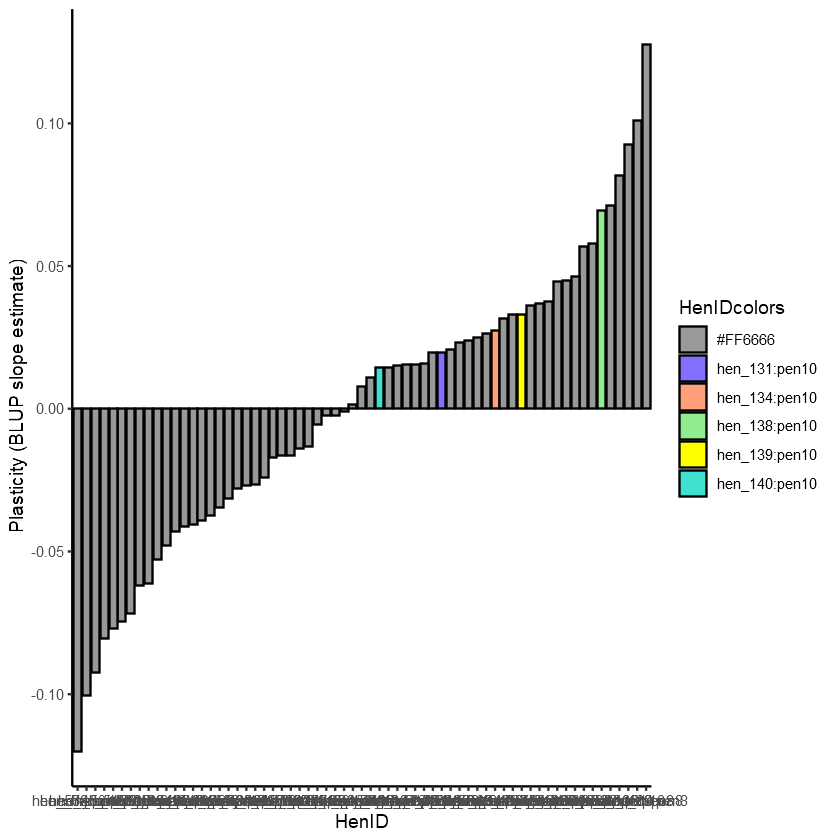

In [36]:
# Rank the BLUPs in order
# Sort BLUPs by slope of most to least plastic
HenID_results$res_ordered = factor(HenID_results$HenID, levels = HenID_results$HenID[order(HenID_results$BLUP_slopes)])
ggplot(HenID_results, aes(res_ordered, BLUP_slopes)) +
scale_fill_manual(values=c("#999999", "lightslateblue", "lightsalmon", "palegreen2", "yellow", "turquoise")) +
geom_bar(stat = "identity", aes(group = HenID, fill = HenIDcolors), show.legend = TRUE, col='black') +
xlab("HenID") +
ylab("Plasticity (BLUP slope estimate)") +
theme_classic()
#ggsave(file.path(path_,'Adaptability','BLUPslopes.png'),width=12, height=4, bg = "transparent")

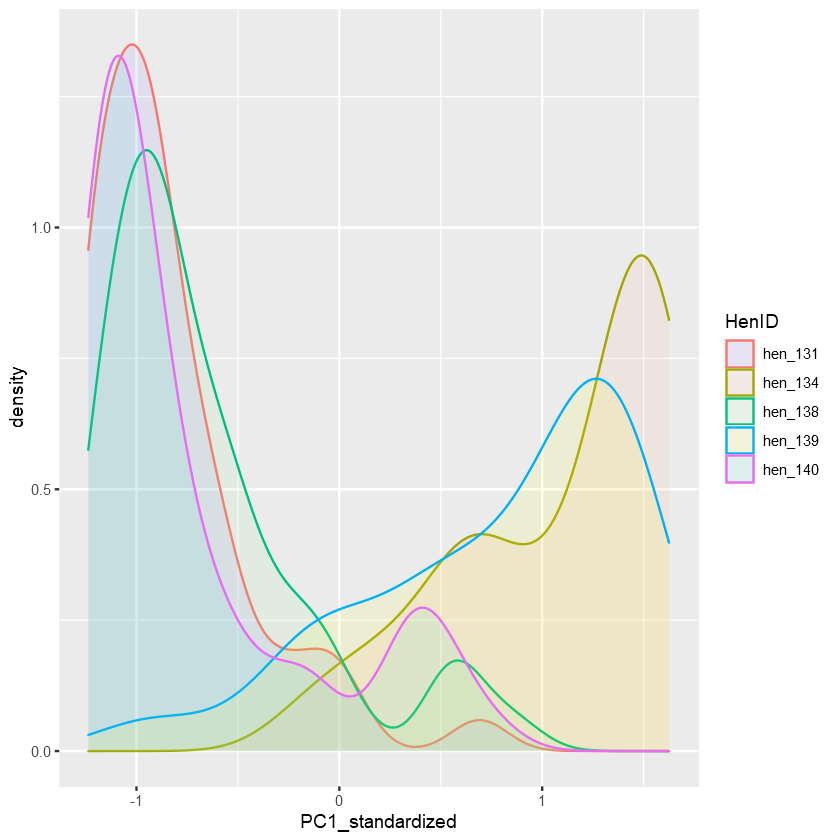

In [37]:
ggplot(df_plot, aes(PC1_standardized, fill = HenID, colour = HenID)) + geom_density(alpha = 0.1) +
scale_fill_manual(values=c("lightslateblue", "lightsalmon", "palegreen2", "yellow", "turquoise"))
#ggsave(file.path(path_,'Adaptability','MvtVarDensities.png'),width=12, height=4, bg = "transparent")

In [38]:
#save
write.csv(HenID_results, file.path(path_,'Adaptability','Individualbehavoiuraltype.csv'), row.names = FALSE)

# Repeatabilities / week

### week 1

In [175]:
df_ = df[ which(df$WIB==1), ] 
model1.WIB1 = lmer(PC1_standardized ~ weeklyavgDIB + (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB1)
r.squaredGLMM(model1.WIB1)
0.8323    /(0.8323   +0.37807)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ weeklyavgDIB + (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   842.3    857.8   -417.1    834.3      354 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1836 -0.4193  0.1389  0.4708  2.8597 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.8323   0.9123  
 Residual             0.3780   0.6148  
Number of obs: 358, groups:  HenID, 65

Fixed effects:
             Estimate Std. Error t value
(Intercept)    0.8550     1.4452   0.592
weeklyavgDIB  -0.1108     0.3854  -0.287

Correlation of Fixed Effects:
            (Intr)
weeklyvgDIB -0.997

R2m,R2c
0.0008167402,0.6879036


[1] 0.687641

In [ ]:
model1.WIB1

ERROR: Error in model1.WIB1$mod: $ operator not defined for this S4 class


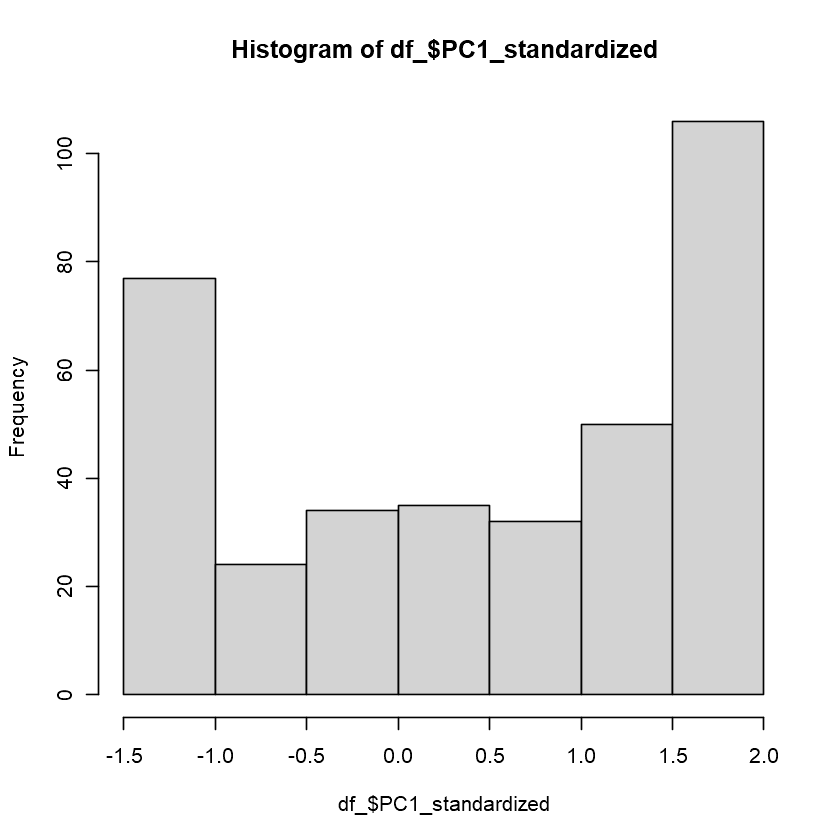

In [173]:
#visualise
hist(df_$PC1_standardized)
###### normally distributed residuals
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
hist(resid(model_$mod))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(model_$mod)

In [154]:
df_ = df[ which(df$WIB==2), ] 
model1.WIB2 = lmer(PC1_standardized ~ weeklyavgDIB + (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB2)
r.squaredGLMM(model1.WIB2)
0.900018/(0.900018+0.192036)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ weeklyavgDIB + (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   484.9    498.9   -238.5    476.9      240 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0184 -0.3316  0.0955  0.3476  4.8912 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.9018   0.9496  
 Residual             0.1920   0.4382  
Number of obs: 244, groups:  HenID, 65

Fixed effects:
             Estimate Std. Error t value
(Intercept)   -3.0789     1.7246  -1.785
weeklyavgDIB   0.3285     0.1594   2.061

Correlation of Fixed Effects:
            (Intr)
weeklyvgDIB -0.998

R2m,R2c
0.03931555,0.8313384


[1] 0.8241516

In [155]:
df_ = df[ which(df$WIB==3), ] 
model1.WIB3 = lmer(PC1_standardized ~ weeklyavgDIB + (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB3)
r.squaredGLMM(model1.WIB3)
0.8471   /(0.8471 +0.2230)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ weeklyavgDIB + (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   780.0    796.2   -386.0    772.0      416 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3115 -0.4325  0.0806  0.3416  3.3031 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.8471   0.9204  
 Residual             0.2230   0.4722  
Number of obs: 420, groups:  HenID, 65

Fixed effects:
             Estimate Std. Error t value
(Intercept)   -1.9097     8.2827  -0.231
weeklyavgDIB   0.1188     0.4537   0.262

Correlation of Fixed Effects:
            (Intr)
weeklyvgDIB -1.000

R2m,R2c
0.0008647805,0.7918244


[1] 0.7916083

In [164]:
df_ = df[ which(df$WIB==4), ] 
model1.WIB4 = lmer(PC1_standardized ~ weeklyavgDIB + (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB4)
r.squaredGLMM(model1.WIB4)
0.5743      /(0.5743    +0.2963   )

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ weeklyavgDIB + (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   916.4    932.8   -454.2    908.4      449 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0548 -0.5523  0.0140  0.4758  3.5510 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.5743   0.7578  
 Residual             0.2963   0.5443  
Number of obs: 453, groups:  HenID, 65

Fixed effects:
             Estimate Std. Error t value
(Intercept)    41.802     85.084   0.491
weeklyavgDIB   -1.672      3.403  -0.491

Correlation of Fixed Effects:
            (Intr)
weeklyvgDIB -1.000

R2m,R2c
0.002299959,0.6604324


[1] 0.65966

In [165]:
df_ = df[ which(df$WIB==5), ] 
model1.WIB5 = lmer(PC1_standardized ~  (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB5)
r.squaredGLMM(model1.WIB5)
0.504293    /(0.504293  +0.164689)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   679.7    692.1   -336.8    673.7      452 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0154 -0.4422 -0.0675  0.4236  3.7342 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.5120   0.7156  
 Residual             0.1647   0.4058  
Number of obs: 455, groups:  HenID, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.27655    0.09077  -3.047

R2m,R2c
0,0.7566406


[1] 0.7538215

In [166]:
df_ = df[ which(df$WIB==6), ] 
model1.WIB6 = lmer(PC1_standardized ~  (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB6)
r.squaredGLMM(model1.WIB6)
0.5419   /(0.5419 +0.1590)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   669.4    681.7   -331.7    663.4      452 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1480 -0.4765 -0.1034  0.3707  3.9851 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.5419   0.7362  
 Residual             0.1590   0.3987  
Number of obs: 455, groups:  HenID, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept)  -0.3145     0.0932  -3.374

R2m,R2c
0,0.7731913


[1] 0.7731488

In [167]:
df_ = df[ which(df$WIB==7), ] 
model1.WIB7 = lmer(PC1_standardized ~  (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB7)
r.squaredGLMM(model1.WIB7)
0.8471   /(0.8471 +0.2230)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   543.5    555.8   -268.7    537.5      452 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0159 -0.4320 -0.0556  0.3612  3.6249 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.7849   0.8860  
 Residual             0.1086   0.3296  
Number of obs: 455, groups:  HenID, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept)  -0.1633     0.1110  -1.471

R2m,R2c
0,0.8784489


[1] 0.7916083

In [168]:
df_ = df[ which(df$WIB==8), ] 
model1.WIB8 = lmer(PC1_standardized ~ (1|HenID), REML = FALSE, data = df_)
summary(model1.WIB8)
r.squaredGLMM(model1.WIB8)
0.8471   /(0.8471 +0.2230)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PC1_standardized ~ (1 | HenID)
   Data: df_

     AIC      BIC   logLik deviance df.resid 
   341.4    352.7   -167.7    335.4      318 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4294 -0.3042 -0.0285  0.3317  2.9354 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.89339  0.9452  
 Residual             0.07233  0.2690  
Number of obs: 321, groups:  HenID, 65

Fixed effects:
            Estimate Std. Error t value
(Intercept)  -0.1406     0.1182  -1.189

R2m,R2c
0,0.9250976


[1] 0.7916083

### WEEK 1

In [174]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

ERROR: Error in `[.data.frame`(data, all.vars(formula)): undefined columns selected


In [10]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB %in% c(1,2,3,4))&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ DIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

Bootstrap Progress:




Repeatability estimation using the lmm method 

Repeatability for HenID
R  = 0.588
SE = 0.062
CI = [0.46, 0.696]
P  = 2.82e-126 [LRT]
     NA [Permutation]


In [11]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB %in% c(5,6,7,8))&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ DIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

Bootstrap Progress:




Repeatability estimation using the lmm method 

Repeatability for HenID
R  = 0.646
SE = 0.059
CI = [0.505, 0.735]
P  = 9.6e-175 [LRT]
     NA [Permutation]


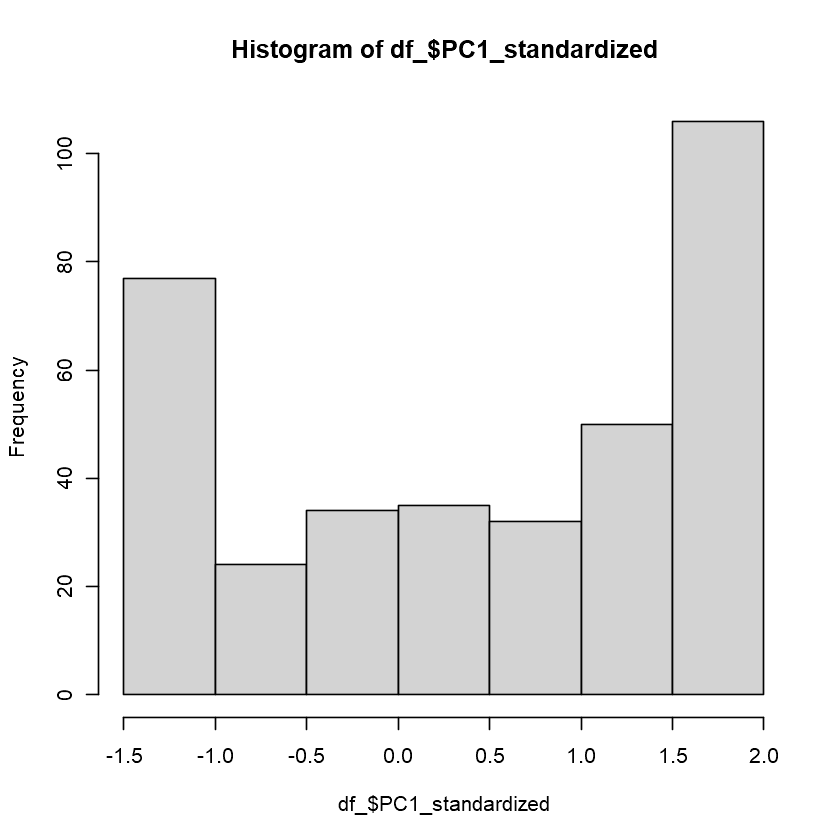

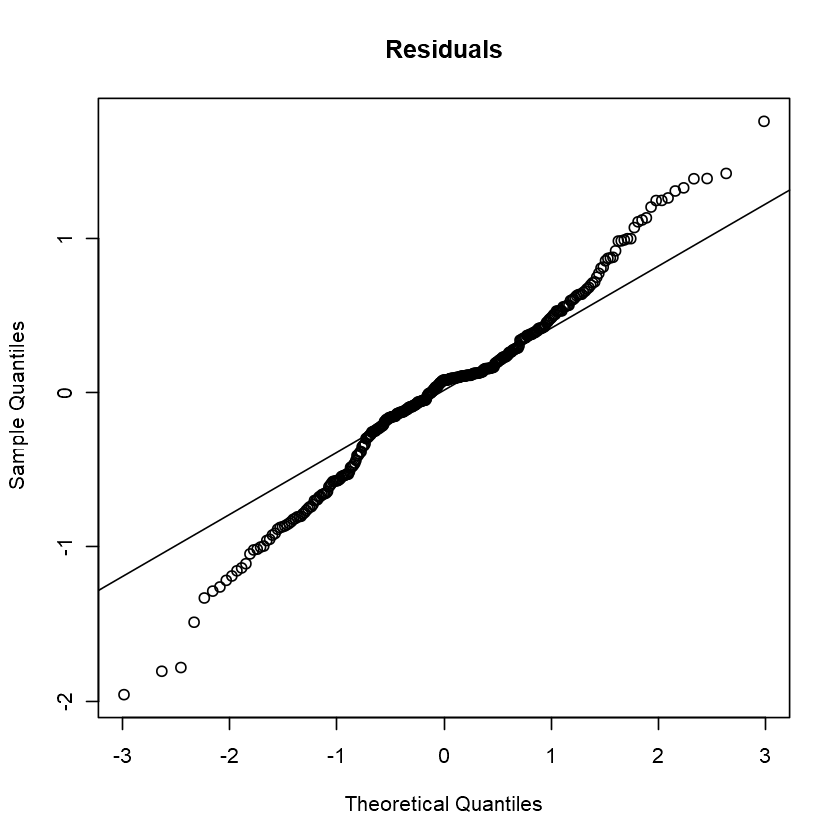

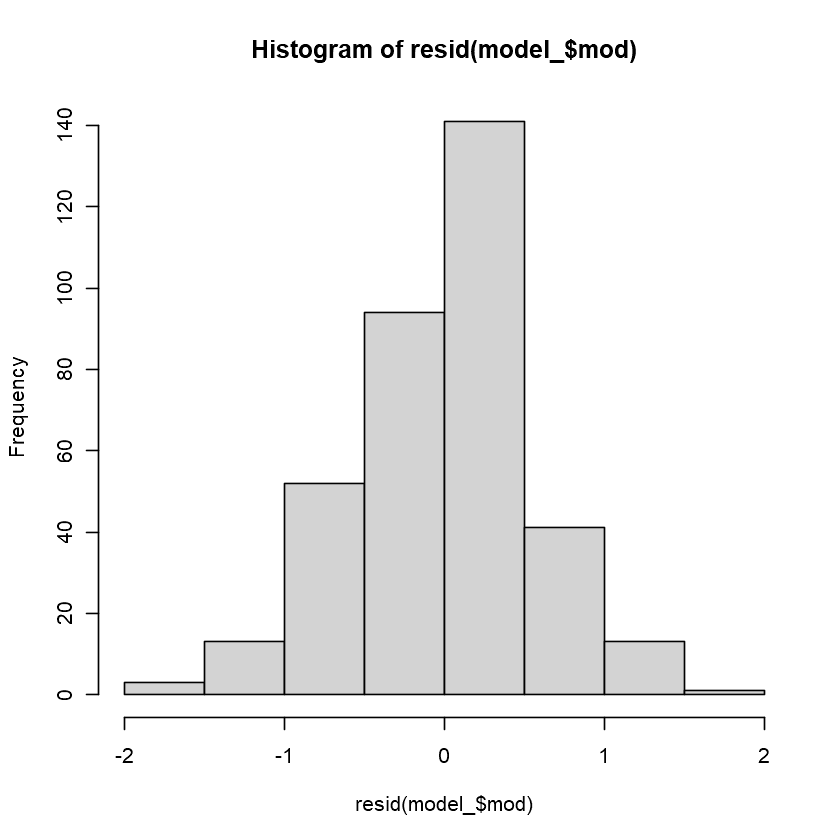

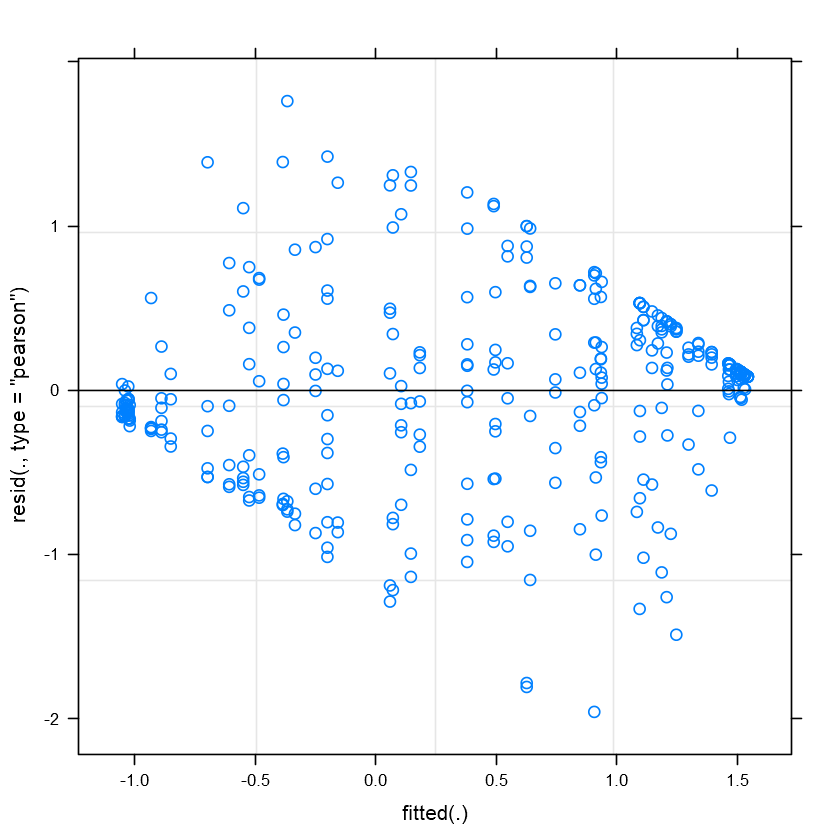

In [66]:
#visualise
hist(df_$PC1_standardized)
###### normally distributed residuals
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
hist(resid(model_$mod))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(model_$mod)

In [51]:
#SAVE all
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_wib = append(li_wib, name)
#save model assumption verification 
###### histogram of dep var 
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path_model,paste0(name,'_Histrogram.jpg')))
hist(df_$PC1_standardized)
dev.off()
###### normally distributed residuals
jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
dev.off()
jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_.jpg', sep='')))
hist(resid(model_$mod))
dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance.jpg', sep='')))
plot(model_$mod)
dev.off()  

png 
  2

png 
  2

png 
  2

png 
  2

#per class MEXP with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('MEXP'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)

#per class LEXP with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('LEXP'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)

#per class other with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)